# Bar plots of coefficients as determined by Lasso, Elastic net, Ridge for the entire dataset (~39000 observations)

In [1]:
import numpy as np
import pandas as pd
import csv
import os
np.random.seed(12345)
import seaborn as sbn
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from IPython.display import HTML
from IPython.display import display



In [2]:
fulldata = pd.read_csv('OnlineNewsPopularity.csv') 
#data = fulldata.sample(n=700, random_state = 0)
#data.to_csv(path_or_buf ='/Users/rigel/Course Docs/Fall-2018/MachineLearning/project/dataset/OnlineNewsPopularity/OnlineNewsPopularitysample.csv' )
data = fulldata.drop(['url',' timedelta'],axis = 1)
std_data = data.copy()
for column in data.columns:
        if column!=' shares':
            std_data[column] = preprocessing.scale(data[column])
def popular(s):
    return 1 if s>1400 else 0
std_data[' popularity'] = data[' shares'].apply(popular)
std_data = std_data.drop([' shares'],axis = 1)
#std_data.head(n=5)
std_data.describe()



,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,popularity
count,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,39644.000000,3.964400e+04,3.964400e+04,3.964400e+04,...,3.964400e+04,3.964400e+04,3.964400e+04,39644.000000,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,39644.000000
mean,3.785355e-16,6.703233e-17,-1.218770e-17,-3.584617e-19,2.150770e-17,8.603080e-17,0.000000,-3.441232e-17,-5.735387e-18,1.376493e-16,...,-3.154463e-17,-1.835324e-16,4.889417e-16,0.000000,1.032370e-16,-6.954157e-17,5.735387e-17,-6.721156e-17,4.301540e-17,0.493442
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013,1.000013e+00,1.000013e+00,1.000013e+00,...,1.000013e+00,1.000013e+00,1.000013e+00,1.000013,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,0.499963
min,-3.972899e+00,-1.160078e+00,-1.557137e-01,-1.904869e-01,-2.110943e-01,-9.604492e-01,-0.854360,-5.468724e-01,-3.042682e-01,-5.386389e+00,...,-1.338384e+00,-3.053998e+00,-5.797463e+00,-1.646847,-9.358111e+00,-8.708066e-01,-4.036308e+00,-1.810719e+00,-6.896581e-01,0.000000
25%,-6.616566e-01,-6.378980e-01,-2.196895e-02,6.750748e-04,-1.943043e-02,-6.074626e-01,-0.594963,-4.265258e-01,-3.042682e-01,-8.270459e-02,...,-6.372594e-01,-6.325204e-01,-5.391186e-01,-0.613383,-1.834899e-01,-8.708066e-01,-2.690762e-01,-9.278964e-01,-6.896581e-01,0.000000
50%,-1.886220e-01,-2.919004e-01,-2.553544e-03,6.750753e-04,3.984330e-04,-2.544760e-01,-0.076169,-4.265258e-01,-3.042682e-01,1.371904e-01,...,6.386488e-02,1.746388e-01,4.847016e-02,0.075594,7.864213e-02,-4.081910e-01,-2.690762e-01,8.377486e-01,-6.896581e-01,0.000000
75%,7.574472e-01,3.597638e-01,1.717856e-02,6.750757e-04,2.004862e-02,2.750039e-01,0.183228,-6.548578e-02,-6.082908e-02,3.630995e-01,...,6.386488e-02,9.817980e-01,5.685644e-01,0.764570,6.029062e-01,6.712454e-01,2.960086e-01,8.377486e-01,4.151124e-01,1.000000
max,5.960828e+00,1.682755e+01,1.989545e+02,1.990003e+02,1.988838e+02,2.586653e+01,29.235709,1.485750e+01,2.184869e+01,4.137038e+00,...,1.268410e+01,9.817980e-01,2.031912e+00,1.798034,1.127170e+00,2.213297e+00,3.498156e+00,8.377486e-01,3.729424e+00,1.000000


**************** Case: 2p ****************
size is  116


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


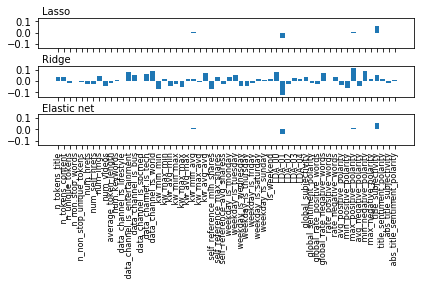

**************** Case: 10p ****************
size is  580


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


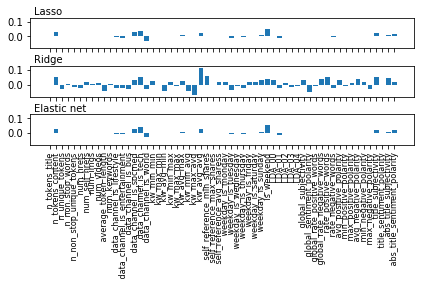

In [3]:
 alphas = np.logspace(-5,5,100)
# kFold=10
# cpus = 2

#---splitting the data into 2p and 10p---
p = (len(std_data.loc[:,:' abs_title_sentiment_polarity'].columns))
n_learn = {'2p': 2*p, '10p': 10*p}
n_total = len(std_data.index)

#--- classifiers ---

def lassocv(size,x_train, y_train, x_test):
    clf = LassoCV(max_iter=100000)
    clf.fit(x_train, y_train)
    #print("Coefficients for Lasso:    "   + str(pd.Series(clf.coef_, index=x_train.columns)))
    xlabels = list(x_train)
    return xlabels, list(clf.coef_)

#     plt.bar(range(len(xlabels)), list(clf.coef_))
#     plt.ylabel('Fitted Coefficients', fontsize=12)
#     plt.xticks(range(len(xlabels)),xlabels, rotation='vertical', fontsize= 8)
#     plt.title('Coefficients for LassoCV size:'+str(n_learn_size), fontsize= 12)
#     plt.tight_layout()
#     plt.savefig ("laaso-"+size+".png", dpi = 1200,pad_inches = 0)
#     plt.show()
    
def elastic_netcv(size,x_train, y_train, x_test):
    
    clf = ElasticNetCV(l1_ratio = 0.5,max_iter=100000)
    clf.fit(x_train, y_train)
    xlabels = list(x_train)
    return xlabels, list(clf.coef_)

#     plt.bar(range(len(xlabels)), list(clf.coef_))
#     plt.ylabel('Fitted Coefficients', fontsize=16)
#     plt.xticks(range(len(xlabels)),xlabels, rotation='vertical', fontsize= 10)
#     plt.title('Coefficients for Elastic Net size:'+str(n_learn_size), fontsize= 16)
#     plt.tight_layout()
#     plt.savefig ("elasticnet-"+size+".png", dpi = 1200,pad_inches = 0)
#     plt.show()

def ridgecv(size,x_train, y_train, x_test):
    clf = RidgeCV()
    clf.fit(x_train, y_train)
    xlabels = list(x_train)
    return xlabels, list(clf.coef_)

#     plt.bar(range(len(xlabels)), list(clf.coef_))
#     plt.ylabel('Fitted Coefficients', fontsize=16)
#     plt.xticks(range(len(xlabels)),xlabels, rotation='vertical', fontsize= 10)
#     plt.title('Coefficients for Ridge CV size:'+str(n_learn_size), fontsize= 16)
#     plt.tight_layout()
#     plt.savefig ("ridgecv-"+size+".png", dpi = 1200,pad_inches = 0)
#     plt.show()


for n_learn_size in n_learn:
    print("**************** Case: " +str(n_learn_size),"****************")
    #print ("n_learn case is: ", n_learn_size)
    size = n_learn[n_learn_size]
    print ("size is ", size) 
    train_set, test_set = train_test_split(std_data, train_size=1.0*size/n_total, random_state=99)
    X_train = train_set.loc[:,:' abs_title_sentiment_polarity']
    Y_train = train_set.loc[:,' popularity']
    X_test = test_set.loc[:,:' abs_title_sentiment_polarity']
    Y_test = test_set.loc[:,' popularity']
    xlabels, lasso_coefs = lassocv(n_learn_size,X_train,Y_train,X_test)
    xlabels, elasticnet_coefs = elastic_netcv(n_learn_size,X_train,Y_train,X_test)
    xlabels, ridge_coefs = ridgecv(n_learn_size,X_train,Y_train,X_test)

    f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
    ax1.bar(range(len(xlabels)), lasso_coefs)
    ax1.text(0.01, 1.1, "Lasso", size=10, transform=ax1.transAxes)
    ax2.bar(range(len(xlabels)), ridge_coefs)
    ax2.text(0.01, 1.1, "Ridge", size=10, transform=ax2.transAxes)
    ax3.bar(range(len(xlabels)), elasticnet_coefs)
    ax3.text(0.01, 1.1, "Elastic net", size=10, transform=ax3.transAxes)
    ax3.set_xticks(range(len(xlabels)))
    ax3.set_xticklabels(xlabels, rotation='vertical', fontsize= 8)
   
    f.subplots_adjust(hspace=0.05)
    plt.tight_layout()
    plt.savefig (n_learn_size+".png", dpi = 1200,pad_inches = 0)
    plt.show()
    
#     plt.ylabel('Fitted Coefficients', fontsize=16)
#     plt.title('Coefficients for Ridge CV size:'+str(n_learn_size), fontsize= 16)
#     plt.tight_layout()
#     plt.xticks(range(len(xlabels)),xlabels, rotation='vertical', fontsize= 10)



# 